In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from vis_settings import flux_types as colors
from vis_settings import panel_titles, line_labels, figsize, mpl_settings

In [2]:
df_emissions = pd.read_csv("emissions_time_series_pulse.csv")
df_emissions_20yr = pd.read_csv("emissions_time_series_20yr.csv")

# Figure 1

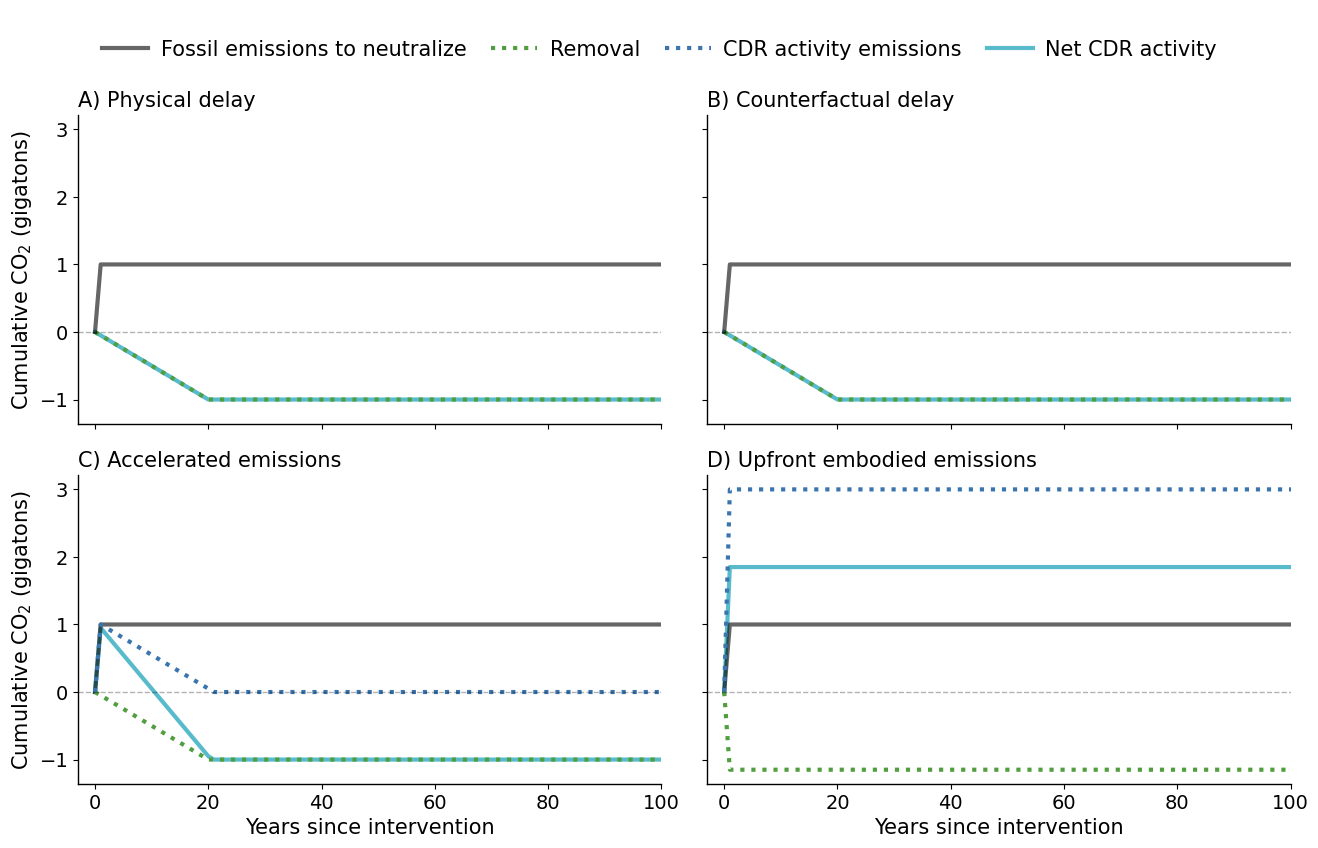

In [3]:
plt.style.use("default")
mpl.rcParams.update(mpl_settings)

def format_subplot():
    plt.xlim([-3, 100])
    plt.axhline(y=0, linestyle="--", color="k", alpha=0.3, linewidth=1)


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=figsize, sharex=True, sharey=True)

plt.subplot(2, 2, 1)
plt.plot(
    df_emissions["co2_cumulative_delay"], color=colors["net-effect"])
plt.plot(
    df_emissions["co2_cumulative_delay"],
    color=colors["removal"],
    linestyle=":",
)
plt.plot(df_emissions["baseline_emission"], color="k", alpha=0.6)
plt.title(panel_titles[0], loc="left", fontsize=mpl_settings["font.size"])
plt.ylabel("Cumulative CO$_2$ (gigatons)", fontsize=mpl_settings["font.size"])

format_subplot()

plt.subplot(2, 2, 2)
plt.plot(
    df_emissions["co2_cumulative_delay"], color=colors["net-effect"])
plt.plot(
    df_emissions["co2_cumulative_delay"],
    color=colors["removal"],
    linestyle=":",
)
plt.plot(df_emissions["baseline_emission"], color="k", alpha=0.6)
plt.title(panel_titles[1], loc="left", fontsize=mpl_settings["font.size"])
format_subplot()

plt.subplot(2, 2, 3)
plt.plot(
    df_emissions["co2_cumulative_delay"] + df_emissions["co2_accelerated_emission"],
    color=colors["net-effect"],
)
plt.plot(df_emissions["baseline_emission"], color="k", alpha=0.6)
plt.plot(
    df_emissions["co2_cumulative_delay"],
    color=colors["removal"],
    linestyle=":",
)
plt.plot(
    df_emissions["co2_accelerated_emission"],
    color=colors["activity-emission"],
    linestyle=":",
)
plt.title(panel_titles[2], loc="left", fontsize=mpl_settings["font.size"])
plt.ylabel("Cumulative CO$_2$ (gigatons)", fontsize=mpl_settings["font.size"])
plt.xlabel("Years since intervention", fontsize=mpl_settings["font.size"])
format_subplot()

plt.subplot(2, 2, 4)
(line4,) = plt.plot(
    df_emissions["upfront_removal_yr1"] + df_emissions["upfront_emissions_yr1"],
    color=colors["net-effect"],
)
(line1,) = plt.plot(
    df_emissions["baseline_emission"],
    color="k",
    alpha=0.6,
    label=line_labels["baseline"],
)
(line2,) = plt.plot(
    df_emissions["upfront_removal_yr1"],
    label=line_labels["removal"],
    color=colors["removal"],
    linestyle=":",
)
(line3,) = plt.plot(
    df_emissions["upfront_emissions_yr1"],
    label=line_labels["activity-emission"],
    color=colors["activity-emission"],
    linestyle=":",
)

# plt.legend()
shared_handles = [line1, line2, line3, line4]
shared_labels = [
    line_labels["baseline"],
    line_labels["removal"],
    line_labels["activity-emission"],
    line_labels["net-effect"],
]
plt.title(panel_titles[3], loc="left", fontsize=mpl_settings["font.size"])
plt.xlabel("Years since intervention", fontsize=mpl_settings["font.size"])

seen = set()
uniq_handles, uniq_labels = [], []
for handle, label in zip(shared_handles, shared_labels):
    if label not in seen:
        uniq_handles.append(handle)
        uniq_labels.append(label)
        seen.add(label)

if len(uniq_labels) > 0:
    fig.legend(
        uniq_handles,
        uniq_labels,
        loc="upper center",
        ncol=len(uniq_labels),
        borderaxespad=1.5,
        handlelength=2.2,
        handletextpad=0.6,
        columnspacing=1.2,
    )

fig.tight_layout(rect=[0.02, 0.02, 0.98, 0.90])

format_subplot()
plt.savefig(fname="../figures/Figure1_v2.pdf")
plt.savefig(fname="../figures/Figure1_v2.png")